# 决策树

### 决策树的手动实现

In [2]:
#计算给定数据集的香农熵
import math
def calShannonEnt(dataSet):
    numSample = len(dataSet)
    labelCount = {}
    for item in dataSet:
        classLabel = item[-1]
        labelCount[classLabel] = labelCount.get(classLabel,0) + 1
    shannonEnt = 0.0
    for key in labelCount:
        temP = labelCount[key] / numSample
        shannonEnt -= temP * math.log(temP,2)
    return shannonEnt

In [3]:
def createDataSet():
    dataSet = [[1,1,'yes'],
              [1,1,'yes'],
              [1,0,'no'],
              [0,1,'no'],
              [0,1,'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet,labels

In [4]:
dataSet,labels = createDataSet()
calShannonEnt(dataSet)

0.9709505944546686

In [5]:
#按照给定特征划分数据集
#axis:划分依据的特征
def splitDataSet(dataSet,axis,value):
    retDataSet = []
    for item in dataSet:
        if item[axis]==value:
            reduceditem = item[:axis]
            reduceditem.extend(item[axis+1:])
            retDataSet.append(reduceditem)
    return retDataSet

#### ID3与C4.5相比，会偏向于选择 取值较多 的特征，C4.5对此作了优化

In [6]:
#选择最优数据集划分方式，使得信息增益最高——ID3算法
def bestSplit_ID3(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEnt = calShannonEnt(dataSet)
    bestGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featureSet = set([sample[i] for sample in dataSet])
        newEnt = 0.0
        for value in featureSet:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEnt += prob * calShannonEnt(subDataSet)
        infoGain = baseEnt - newEnt
        #print(infoGain)
        if (infoGain > bestGain):
            bestGain = infoGain
            bestFeature = i
    return bestFeature

In [7]:
bestSplit_ID3(dataSet)

0

In [8]:
#选择最优数据集划分方式，使得信息增益比最高——C4.5算法
def bestSplit_C45(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEnt = calShannonEnt(dataSet)
    bestGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featureSet = set([sample[i] for sample in dataSet])
        newEnt = 0.0
        featureEn = 0.0
        for value in featureSet:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEnt += prob * calShannonEnt(subDataSet)
            featureEn -= prob * math.log(prob,2)
        
        infoGain = (baseEnt - newEnt) / featureEn
        
        #print(infoGain)
        if (infoGain > bestGain):
            bestGain = infoGain
            bestFeature = i
    return bestFeature

In [9]:
bestSplit_C45(dataSet)

0

In [10]:
#多数表决法，划分数据集后，找到每个子划分中最多的类
def majorityCnt(classlist):
    classCount = {}
    for akey in classcount:
        classcount[item] = classcount.get(akey,0) + 1
    sortedclasscount = sorted(classcount.items(), key=(lambda d:d[1]),reverse=True)
    return sortedclasscount[0][0]

In [11]:
#创建树的函数代码，返回的树是一个嵌套的字典
#labels:特征列表
def createTree(dataSet,labels):
    classList = [sample[-1] for sample in dataSet]
    #若类别相同，则停止划分，返回这个类别
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #若所有特征都被遍历过，不存在特征了，那么选取集合中最多的类作为该划分的类
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    #找到最优的划分特征
    bestFeat = bestSplit_C45(dataSet)
    bestFeatLabel = labels[bestFeat]
    mytree = {bestFeatLabel:{}}
    #删除这个特征，以后不会再用到他了
    del(labels[bestFeat])
    #得到这个特征的所有取值
    featvalues = [sample[bestFeat] for sample in dataSet]
    uniquevalues = set(featvalues)
    #根据不同属性值，将元素划分到子节点中
    for value in uniquevalues:
        subLabels = labels[:]
        mytree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    
    return mytree

In [12]:
#算法会改动labels的值，传入一个labels的拷贝
dataSet,labels = createDataSet()
myTree = createTree(dataSet,labels[:])

In [13]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [14]:
labels

['no surfacing', 'flippers']

In [23]:
#使用决策树进行分类
def classify(inputTree,featLabels,testVec):
    #取得根节点的特征
    firstStr = list(inputTree.keys())[0]
    #该特征的子树
    secondDict = inputTree[firstStr]
    #该特征的索引值
    featIndex = featLabels.index(firstStr)
    #找出测试样本所在的子节点
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=='dict':
                classLabel = classify(secondDict[key],featLabels,testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

In [24]:
classify(myTree,labels,[1,0])

'no'

In [25]:
classify(myTree,labels,[1,1])

'yes'

#### 存储决策树——pickle

In [35]:
import pickle
def storeTree(tree, filename):
    with open(filename,'wb') as fp:
        pickle.dump(tree,fp)

In [36]:
def grabTree(filename):
    with open(filename,'rb') as fp:
        return pickle.load(fp)

In [37]:
storeTree(myTree,'mytree.txt')

In [38]:
myTree_load=grabTree('mytree.txt')

In [40]:
myTree_load

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

#### 决策树剪枝
* 暂时没写

#### 可视化决策树
* 使用matplotlib的文本注解功能来绘制决策树

In [44]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]    #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

#def createPlot():
#    fig = plt.figure(1, facecolor='white')
#    fig.clf()
#    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
#    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#    plt.show()

def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

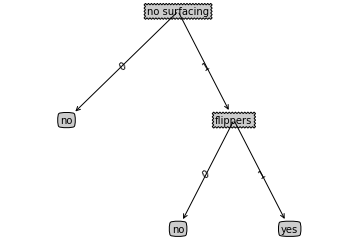

In [49]:
createPlot(myTree)

#### 处理隐形眼镜数据集

In [50]:
def DecisionTreeTest():
    with open('lenses.txt','r') as fp:
        lenses = [line.strip().split('\t') for line in fp.readlines()]
    
    labels = ['age','prescript','astigmatic','tearRate']
    lensesTree = createTree(lenses,labels)
    createPlot(lensesTree)

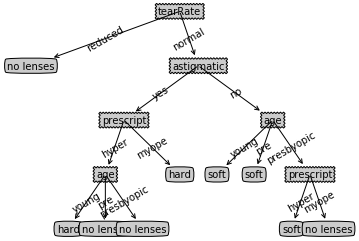

In [51]:
DecisionTreeTest()